fmin: torch.Size([2, 2, 1]), fmax: torch.Size([2, 2, 1]), freqs: torch.Size([1, 1, 501])
Below band mask: tensor([[[1., 1., 1.,  ..., 0., 0., 0.],
         [1., 1., 1.,  ..., 0., 0., 0.]],

        [[1., 1., 1.,  ..., 0., 0., 0.],
         [1., 1., 1.,  ..., 0., 0., 0.]]])
Above band mask: tensor([[[0., 0., 0.,  ..., 1., 1., 1.],
         [0., 0., 0.,  ..., 1., 1., 1.]],

        [[0., 0., 0.,  ..., 1., 1., 1.],
         [0., 0., 0.,  ..., 1., 1., 1.]]])


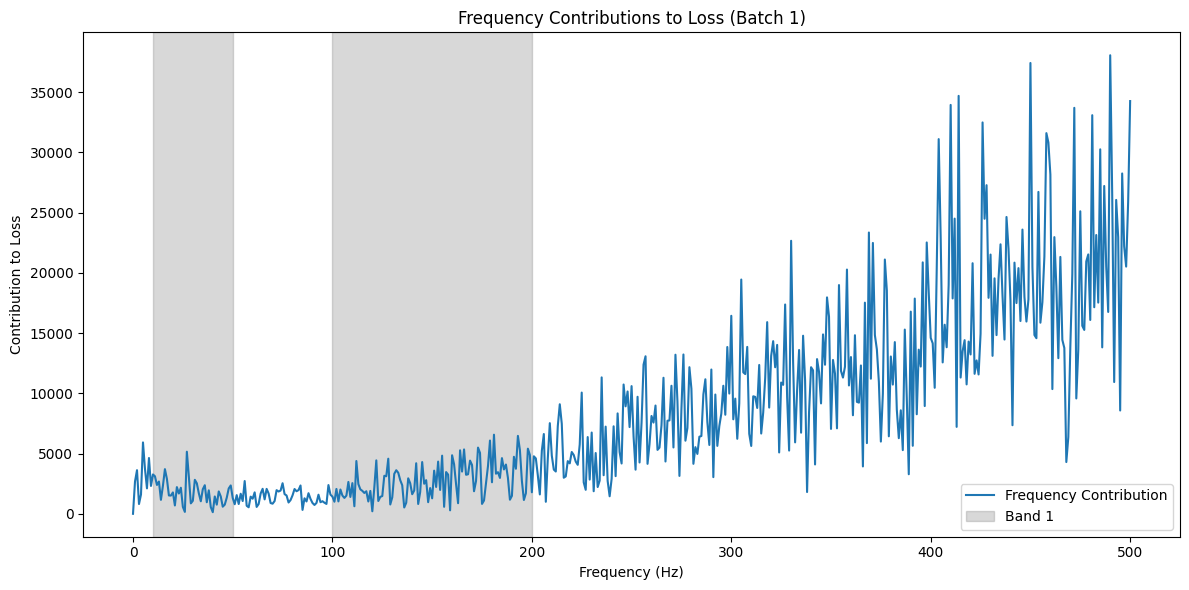

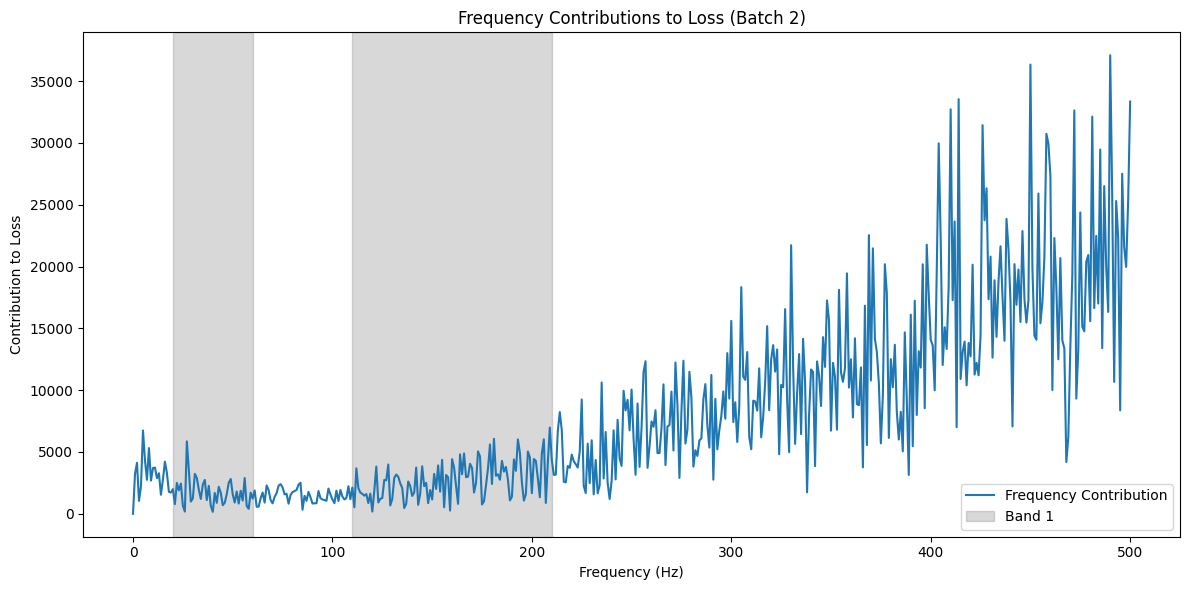

Loss: 8276.6875
Gradients for components: tensor([[[ 9.4417, -3.1287,  3.5164,  ..., -0.8877,  2.3796, -7.8143],
         [-6.7163,  6.7917, -6.8833,  ...,  6.7693, -7.7831,  6.9809]]])


In [2]:
import torch
from band_leakage_loss import band_leakage_loss

# Define example inputs
batch_size = 2
n_components = 3
signal_length = 1024
n_bands = 2

# Random components (model output) with gradients enabled
components = torch.randn(1, 2, 1000, requires_grad=True)

# Example frequency bands
frequency_bands = torch.tensor([
    [[10, 50], [100, 200]],  # Bands for batch element 1
    [[20, 60], [110, 210]]  # Bands for batch element 2
], dtype=torch.float32)

# Call the loss function
loss = band_leakage_loss(components, frequency_bands=frequency_bands)

# Backpropagate to compute gradients
loss.backward()

# Check if gradients are non-zero
print("Loss:", loss.item())
print("Gradients for components:", components.grad)